<a href="https://colab.research.google.com/github/Ryo0jp/Q_learning/blob/main/Udemy_%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%EF%BC%88Q%E5%AD%A6%E7%BF%92%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

アクション: 0
現在の状態: (0, 1)
Qテーブル:
 [[[-0.1  0. ]
  [ 0.   0. ]
  [ 0.   0. ]]]
アクション: 0
現在の状態: (0, 2)
Qテーブル:
 [[[-0.1  0. ]
  [10.   0. ]
  [ 0.   0. ]]]
エピソード終了
アクション: 1
現在の状態: (0, 0)
Qテーブル:
 [[[-0.1 -0.1]
  [10.   0. ]
  [ 0.   0. ]]]
アクション: 0
現在の状態: (0, 1)
Qテーブル:
 [[[ 0.71 -0.1 ]
  [10.    0.  ]
  [ 0.    0.  ]]]
アクション: 0
現在の状態: (0, 2)
Qテーブル:
 [[[ 0.71 -0.1 ]
  [19.    0.  ]
  [ 0.    0.  ]]]
エピソード終了
アクション: 0
現在の状態: (0, 1)
Qテーブル:
 [[[ 2.249 -0.1  ]
  [19.     0.   ]
  [ 0.     0.   ]]]
アクション: 0
現在の状態: (0, 2)
Qテーブル:
 [[[ 2.249 -0.1  ]
  [27.1    0.   ]
  [ 0.     0.   ]]]
エピソード終了
アクション: 1
現在の状態: (0, 0)
Qテーブル:
 [[[2.249e+00 1.241e-02]
  [2.710e+01 0.000e+00]
  [0.000e+00 0.000e+00]]]
アクション: 0
現在の状態: (0, 1)
Qテーブル:
 [[[4.3631e+00 1.2410e-02]
  [2.7100e+01 0.0000e+00]
  [0.0000e+00 0.0000e+00]]]
アクション: 0
現在の状態: (0, 2)
Qテーブル:
 [[[4.3631e+00 1.2410e-02]
  [3.4390e+01 0.0000e+00]
  [0.0000e+00 0.0000e+00]]]
エピソード終了
アクション: 0
現在の状態: (0, 1)
Qテーブル:
 [[[6.92189e+00 1.24100e-02]
  [3.43900e+01 0.0000

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12477 (\N{KATAKANA LETTER SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

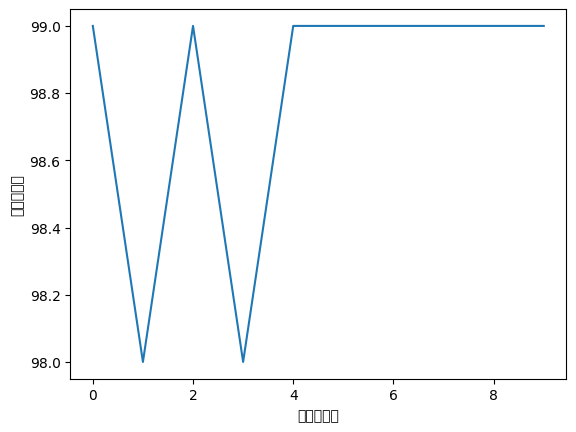

In [1]:
import numpy as np
import matplotlib.pyplot as plt

maze = np.array([
    [0,0,0]
])

START = (0,0)
GOAL = (0,2)
REWARD_GOAL = 100
REWARD_STEP = -1
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1
EPISODES = 10

q_table = np.zeros((maze.shape[0], maze.shape[1], 2))

actions = [(0,1), (0,-1)]

def choose_action(state):
    if np.random.uniform(0,1) < EPSILON:
        return np.random.choice(len(actions))
    else:
        return np.argmax(q_table[state[0], state[1]])

def next_state(state, action):
    next_s = (state[0] + action[0], state[1] + action[1])
    if 0 <= next_s[1] < maze.shape[1]:
        return next_s
    else:
        return state

def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state[0], next_state[1]])
    td_target = reward + GAMMA * q_table[next_state[0], next_state[1], best_next_action]
    q_table[state[0], state[1], action] += ALPHA * (td_target - q_table[state[0], state[1], action])

rewards = []
for episode in range(EPISODES):
    state = START
    total_reward = 0
    steps = 0
    max_steps = 100  # 無限ループ防止用

    while state != GOAL and steps < max_steps:
        action = choose_action(state)
        next_s = next_state(state, actions[action])

        if next_s == GOAL:
            reward = REWARD_GOAL
        else:
            reward = REWARD_STEP

        update_q_table(state, action, reward, next_s)
        state = next_s
        total_reward += reward
        steps += 1

        print("アクション:", action)
        print("現在の状態:", state)
        print("Qテーブル:\n", q_table)

    rewards.append(total_reward)
    print("エピソード終了")

plt.plot(range(EPISODES), rewards)
plt.xlabel('エピソード')
plt.ylabel('報酬の合計')
plt.show()

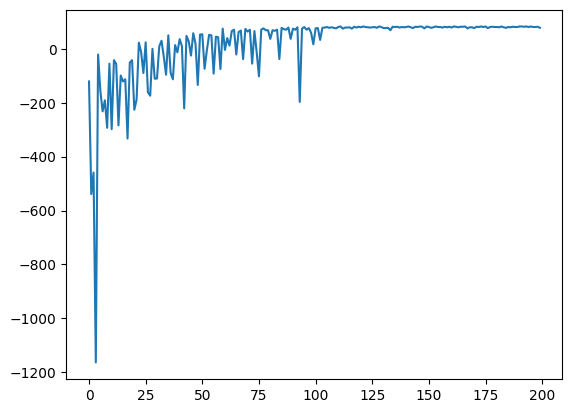

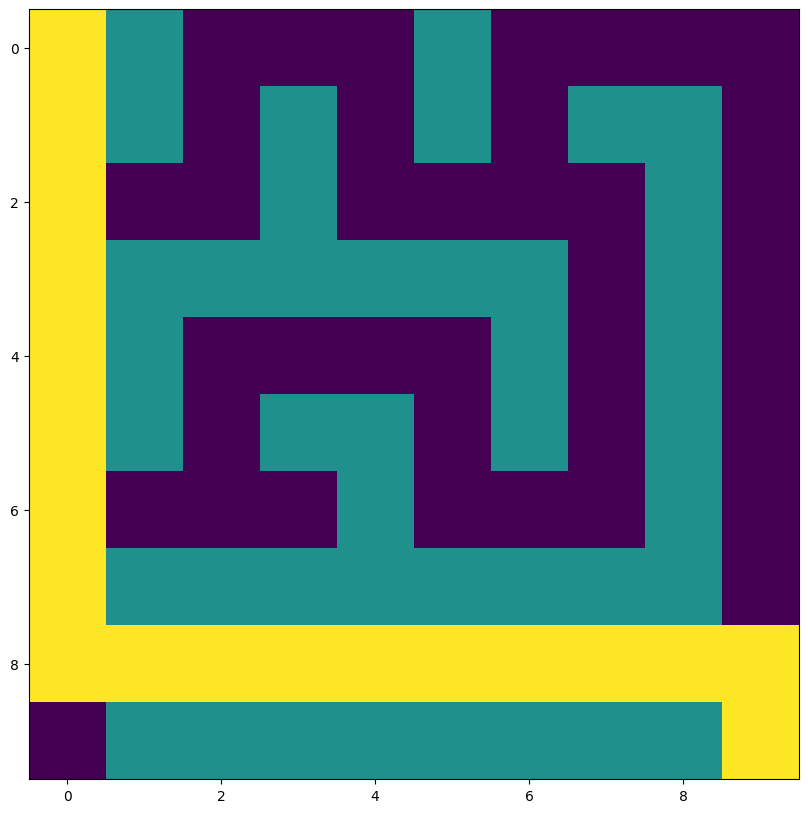

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 9)]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 迷路の設定
maze = np.array([
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
    ])

# 定数の設定
START = (0, 0)
GOAL = (9, 9)
REWARD_GOAL = 100
REWARD_STEP = -1
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1
EPISODES = 200

# Qテーブルの初期化
q_table = np.zeros((maze.shape[0], maze.shape[1], 4))

# 行動の設定（上下左右）
actions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

# 次の行動を決める
def choose_action(state):
  if np.random.uniform(0, 1) < EPSILON:
    return np.random.choice(len(actions))
  else:
    return np.argmax(q_table[state])

# 次の状態に移る関数
def next_state(state, action):
  next_st = (state[0] + action[0], state[1] + action[1])
  if 0 <= next_st[0] < maze.shape[0] and 0 <= next_st[1] < maze.shape[1] and maze[next_st] == 0:
    return next_st
  else:
    return state

# Qテーブルの更新
def update_q_table(state, action, reward, next_state):
  best_next_action = np.argmax(q_table[next_state])
  td_target = GAMMA * q_table[next_state][best_next_action]
  td_error = td_target - q_table[state][action]
  q_table[state][action] += ALPHA * (td_error + reward)

# Q学習
rewards = []
for episode in range(EPISODES):
  state = START
  total_reward = 0
  while state != GOAL:
    action = choose_action(state)
    next_st = next_state(state, actions[action])
    if next_st == GOAL:
      reward = REWARD_GOAL
    else:
      reward = REWARD_STEP
    update_q_table(state, action, reward, next_st)
    state = next_st
    total_reward += reward
  rewards.append(total_reward)

# 結果の可視化
plt.plot(range(EPISODES), rewards)
plt.show()

# 最適経路の取得
state = START
path = [state]
while state != GOAL:
  action = np.argmax(q_table[state])
  state = next_state(state, actions[action])
  path.append(state)

# 迷路と最適経路の可視化
maze_with_path = maze.copy()
for i in path:
  maze_with_path[i] = 2

plt.figure(figsize=[10, 10])
plt.imshow(maze_with_path)
plt.show()

print(path)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# 定数の設定
EPISODES = 100000
ALPHA = 0.01
GAMMA = 0.9
INITIAL_EPSILON = 1.0
EPSILON_DECAY = INITIAL_EPSILON / (EPISODES / 10)
FINAL_EPSILON = 0.1


# カードデッキを作成してシャッフルする関数
def create_deck():
  deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
  np.random.shuffle(deck)
  return deck

# 自分の手札を合計する関数
def sum_hand(hand):
  total = sum(hand)
  if 1 in hand and total + 10 <= 21:
    return total + 10
  return total

# プレイヤーの手札やディーラーの手札の環境をリセット
def reset_env(deck):
  player_hand = [deck.pop(), deck.pop()]
  dealer_hand = [deck.pop(), deck.pop()]
  done = False
  return deck, player_hand, dealer_hand, done

# 状態を取得する関数
def get_state(player_hand, dealer_hand):
  usable_ace = 1 in player_hand and sum(player_hand) + 10 <= 21
  return (sum_hand(player_hand), dealer_hand[0], usable_ace)

# 次の行動を決める関数
def choose_action(state, q_table, epsilon):
  if np.random.uniform(0, 1) < epsilon:
    return np.random.choice([0, 1])
  else:
    return np.argmax(q_table[state])

# 行動を実行して次の状態と報酬を取得
def step_env(deck, player_hand, dealer_hand, action):
  if action == 1: # ヒット
    player_hand.append(deck.pop())
    if sum_hand(player_hand) > 21:
      return deck, player_hand, dealer_hand, -1, True

  if action == 0: #スタンド
    while sum_hand(dealer_hand) < 17:
      dealer_hand.append(deck.pop())
    player_sum = sum_hand(player_hand)
    dealer_sum = sum_hand(dealer_hand)
    if dealer_sum > 21 or player_sum > dealer_sum:
      return deck, player_hand, dealer_hand, 1, True
    elif player_sum < dealer_sum:
      return deck, player_hand, dealer_hand, -1, True
    else:
      return deck, player_hand, dealer_hand, 0, True

  return deck, player_hand, dealer_hand, 0, False

# Qテーブルの更新関数
def update_q_table(q_table, state, action, reward, next_state, done, alpha, gamma):
  best_next_action = 0 if done else np.max(q_table[next_state])
  td_target = gamma * best_next_action
  td_error = td_target - q_table[state][action]
  q_table[state][action] += alpha * (td_error + reward)

def train_agent(episodes, alpha, initial_epsilon, epsilon_decay, final_epsilon, gamma):
  #　Q値を初期化
  q_table = defaultdict(lambda: np.zeros(2))
  episode_rewards = []
  epsilon = initial_epsilon

  for episode in range(episodes):
    deck = create_deck() # カードデッキを作成
    deck, player_hand, dealer_hand, done = reset_env(deck) # プレイヤーの手札やディーラーの手札の環境をリセット
    state = get_state(player_hand, dealer_hand) # 初期状態を取得
    total_reward = 0

    while not done:
      action = choose_action(state, q_table, epsilon) # 次の行動を決定
      deck, player_hand, dealer_hand, reward, done = step_env(deck, player_hand, dealer_hand, action) # 行動を実行して次の状態と報酬を取得
      next_state = get_state(player_hand, dealer_hand)
      update_q_table(q_table, state, action, reward, next_state, done, alpha, gamma) # Qテーブルを更新
      state = next_state
      total_reward += reward # 状態を更新して累積報酬を更新

    epsilon = max(final_epsilon, epsilon - epsilon_decay)
    episode_rewards.append(total_reward)

  return q_table, episode_rewards


q_table, episode_rewards = train_agent(EPISODES, ALPHA, INITIAL_EPSILON, EPSILON_DECAY, FINAL_EPSILON, GAMMA)

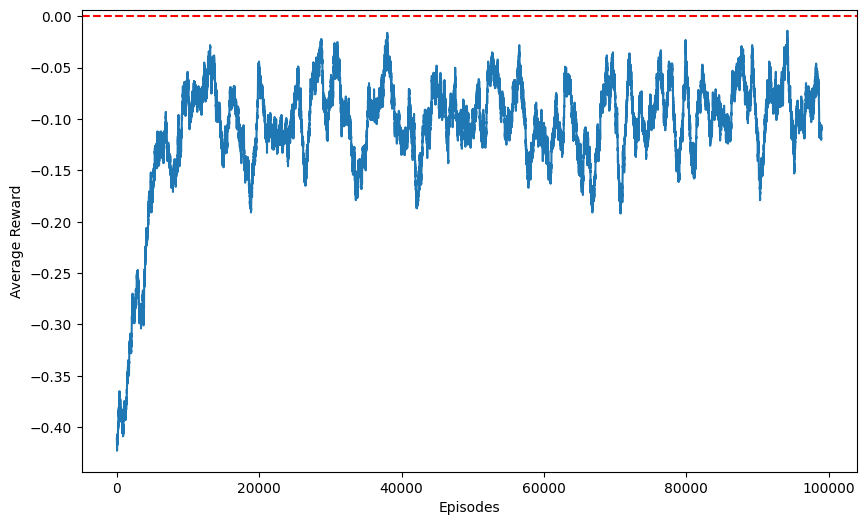

In [7]:
#報酬の移動平均を計算
window_size = 1000
averages = []
for i in range(len(episode_rewards) - window_size + 1):
  window = episode_rewards[i:i + window_size]
  window_average = sum(window) / window_size
  averages.append(window_average)

#移動平均をプロット
plt.figure(figsize = (10,6))
plt.plot(averages)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.show()

In [11]:
# エージェントが1回のエピソードと実行する関数
def play_one_episode(q_table, epsilon=0.0):
  deck = create_deck()
  deck, player_hand, dealer_hand, done = reset_env(deck)
  state = get_state(player_hand, dealer_hand)

  print(f"initial player hand: {player_hand}, dealer hand: {dealer_hand[0]}")

  while not done:
    action = choose_action(state, q_table, epsilon)
    action_str = "Hit" if action == 1 else "Stand"
    print(f"Player action: {action_str}")

    deck, player_hand, dealer_hand, reward, done = step_env(deck, player_hand, dealer_hand, action)
    state = get_state(player_hand, dealer_hand)

    print(f"player hand: {player_hand}, dealer hand: {dealer_hand[0]}")

  if reward == 1:
    result = "Win"
  elif reward == -1:
    result = "Lose"
  else:
    result = "Draw"

  print(f"Final player hand: {player_hand}, Final dealer hand: {dealer_hand}, result: {result}")


play_one_episode(q_table)

initial player hand: [3, 6], dealer hand: 9
Player action: Stand
player hand: [3, 6], dealer hand: 9
Final player hand: [3, 6], Final dealer hand: [9, 10], result: Lose


In [12]:
play_one_episode(q_table)

initial player hand: [9, 10], dealer hand: 1
Player action: Stand
player hand: [9, 10], dealer hand: 1
Final player hand: [9, 10], Final dealer hand: [1, 2, 10, 10], result: Win


In [13]:
q_table = defaultdict(lambda: np.zeros(2))
play_one_episode(q_table)

initial player hand: [2, 7], dealer hand: 10
Player action: Stand
player hand: [2, 7], dealer hand: 10
Final player hand: [2, 7], Final dealer hand: [10, 7], result: Lose
